In [1]:
%config IPCompleter.greedy=True

import pandas
import numpy
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [2]:
classes = {
    1: 'normal',
    2: 'hyperthyroidism',
    3: 'hypothyroidism'
}

attributes = [
    'age',
    'sex',
    'on_thyroxine',
    'query_on_thyroxine',
    'on_antithyroid_medication',
    'sick',
    'pregnant',
    'thyroid_surgery',
    'I131_treatment',
    'query_hypothyroid',
    'query_hyperthyroid',
    'lithium',
    'goitre',
    'tumor',
    'hypopituitary',
    'psych',
    'TSH',
    'T3',
    'TT4',
    'T4U',
    'FTI'
]

In [3]:
train_data = []
train_data_labels = []

with open('data/ann-train.data') as data_file:
    train_data = pandas.read_csv(data_file, delimiter=' ', header=None)

train_data = train_data.drop(labels=[22,23], axis='columns')

train_data.columns = attributes + ['class']

train_data_labels = train_data['class']

train_data = train_data.drop('class', axis='columns')

In [4]:
anova_filter = SelectKBest(f_classif, k='all')

anova_filter.fit(train_data, train_data_labels)

attribute_score = [ (name, score) for name, score in zip(train_data.columns, numpy.around(anova_filter.scores_, 2)) ]

attribute_score.sort(key=lambda x: x[1], reverse=True)

print(*('{}: {}'.format(name, score) for name, score in attribute_score), sep='\n')

TSH: 1148.28
FTI: 340.53
TT4: 290.46
T3: 119.54
on_thyroxine: 14.73
query_hypothyroid: 13.97
sex: 4.43
T4U: 2.93
sick: 2.81
psych: 2.64
pregnant: 2.19
thyroid_surgery: 1.6
goitre: 1.36
on_antithyroid_medication: 0.92
query_hyperthyroid: 0.71
query_on_thyroxine: 0.67
age: 0.57
lithium: 0.24
tumor: 0.18
I131_treatment: 0.13
hypopituitary: 0.04


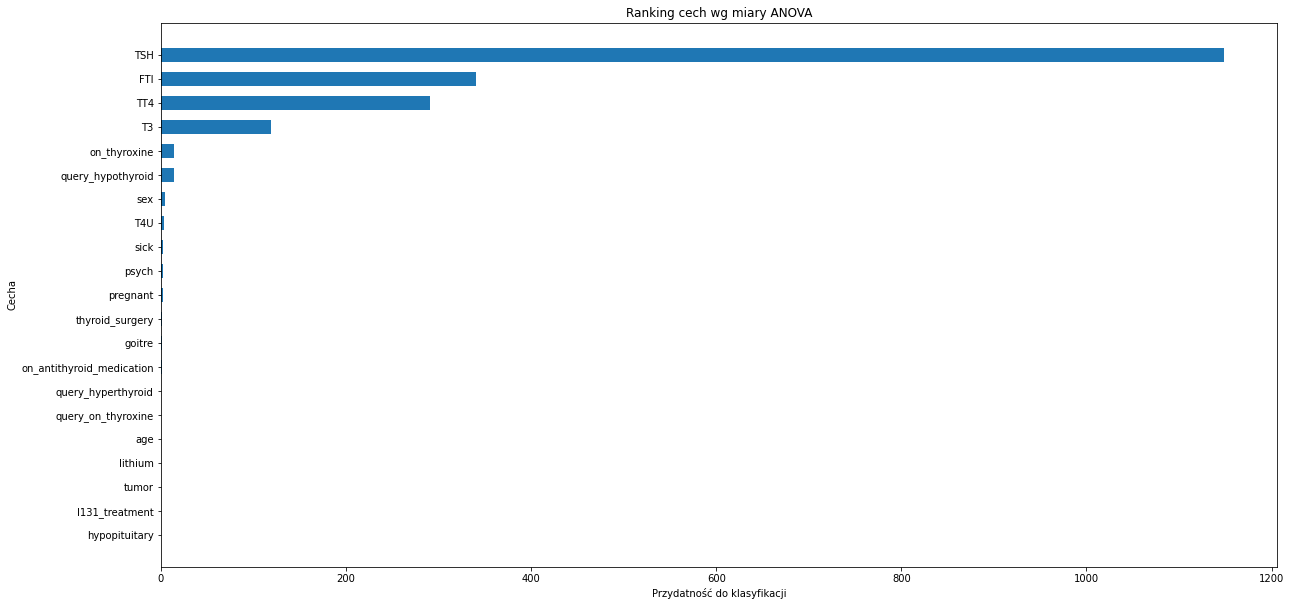

In [5]:
plt.figure(figsize=(20,10))

y_pos = numpy.arange(len(attributes))
plt.barh(y_pos, [ score[1] for score in attribute_score ], height=0.6)
plt.yticks(y_pos, [ score[0] for score in attribute_score ])
plt.gca().invert_yaxis()
plt.title('Ranking cech wg miary ANOVA')
plt.xlabel('Przydatność do klasyfikacji')
plt.ylabel('Cecha')
plt.show()

In [6]:
from sklearn import tree
from sklearn import clone

#test data do badania (mozna wyrzucic lub dać gdzie indziej)
with open('data/ann-test.data') as data_file:
    test_data = pandas.read_csv(data_file, delimiter=' ', header=None)
test_data = test_data.drop(labels=[22,23], axis='columns')
test_data.columns = attributes + ['class']
test_data_labels = test_data['class']
test_data = test_data.drop('class', axis='columns')


#Drzewo decyzyjne cart – 2 różne kryteria podziału oraz 3 wartościmaksymalnej głębokości drzewa.
#glebokosc dobrana eksperymentalnie dla zbioru uczacego, np bez jej ograniczania best ma glebokość 8
models = {
    'random5' : tree.DecisionTreeClassifier(max_depth=5, splitter='random'),
    'random15' : tree.DecisionTreeClassifier(max_depth=15, splitter='random'),
    'random25' : tree.DecisionTreeClassifier(max_depth=25, splitter='random'),
    'best3' : tree.DecisionTreeClassifier(max_depth=3, splitter="best"),
    'best5' : tree.DecisionTreeClassifier(max_depth=5, splitter="best"),
    'best10' : tree.DecisionTreeClassifier(max_depth=10, splitter="best"),
}

results = {}
#dla roznych liczb cech od 1 do max_liczby cech przeprowadzamy badanie
for features_number in range (0,len(attributes)):
    feature_count = features_number +1
    data = SelectKBest(f_classif, k=feature_count)
    data.fit(train_data, train_data_labels)
    #dla kazdych parametrow drzewa
    for model_type in models.values():
        test = clone(model_type)
        test.fit(train_data,train_data_labels)
        #tu trzeba zamiast tego zrobić te walidacje, ocenę parametrow drzewa. Sprawdzalem tylko czy dziala to wgl
        results[str(features_number)+str(test)+"depth:"+str(test.get_depth())]= test.score(test_data, test_data_labels)
        

In [7]:
results

{"0DecisionTreeClassifier(max_depth=5, splitter='random')depth:5": 0.9343640606767795,
 "0DecisionTreeClassifier(max_depth=15, splitter='random')depth:15": 0.9865810968494749,
 "0DecisionTreeClassifier(max_depth=25, splitter='random')depth:23": 0.98512252042007,
 '0DecisionTreeClassifier(max_depth=3)depth:3': 0.9877479579929989,
 '0DecisionTreeClassifier(max_depth=5)depth:5': 0.9921236872812136,
 '0DecisionTreeClassifier(max_depth=10)depth:8': 0.9921236872812136,
 "1DecisionTreeClassifier(max_depth=5, splitter='random')depth:5": 0.9798716452742123,
 "1DecisionTreeClassifier(max_depth=15, splitter='random')depth:15": 0.983955659276546,
 "1DecisionTreeClassifier(max_depth=25, splitter='random')depth:17": 0.9892065344224037,
 '1DecisionTreeClassifier(max_depth=3)depth:3': 0.9877479579929989,
 '1DecisionTreeClassifier(max_depth=5)depth:5': 0.9921236872812136,
 '1DecisionTreeClassifier(max_depth=10)depth:8': 0.9921236872812136,
 "2DecisionTreeClassifier(max_depth=5, splitter='random')depth: